In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from sage.all import *
from utility import *



In [100]:
x,y,z = var('x, y, z', domain=CC)

# Equation of affine surface
# s1, s2, s3, s4 = var('s1, s2, s3, s4', domain=CC)
a1, a2, a3, a4 = var('a1, a2, a3, a4', domain=CC)
# make sure to read van der Put + Saito for the relations between the parameters:
# si = aia4 + ajak for (i,j,k) a cyclic permutation of (1,2,3)
# s4 = a1a2a3a4 + a1^2 + a2^2 + a3^2 + a4^2 - 4
# ai in C
s1 = a1*a4 + a2*a3
s2 = a2*a4 + a3*a1
s3 = a3*a4 + a1*a2
s4 = a1*a2*a3*a4 + a1^2 + a2^2 + a3^2 + a4^2 - 4

s1=s1.subs({a1:0, a2:0, a3:0, a4:0})
s2=s2.subs({a1:0, a2:0, a3:0, a4:0})
s3=s3.subs({a1:0, a2:0, a3:0, a4:0})
s4=s4.subs({a1:0, a2:0, a3:0, a4:0})


G_eq = x*y*z + x^2 + y^2 + z^2 - s1*x - s2*y - s3*z + s4
print(G_eq)

alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
fibration_eq = alpha*x + beta*y + gamma*z
fibration_eq = fibration_eq.subs({alpha:3, beta:1j, gamma:-0.5})
# fibration_eq = x-z+y
print(fibration_eq)

f = LefschetzFibration([x,y,z], G_eq, fibration_eq)
print(f.get_fibre(0, z).simplify())

rho_eq = 0.25*x+0.3*y
# rho_eq = x+z

x*y*z + x^2 + y^2 + z^2 - 4
3*x + 1.00000000000000*I*y - 0.500000000000000*z
2*(3*x + I*y)*x*y + 4*(3*x + I*y)^2 + x^2 + y^2 - 4


In [95]:
crit_points_f = f.get_critical_points()
crit_values_f = f.get_critical_values()


print(len(crit_values_f))
print(len(crit_points_f))

5
5


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of pi'}>)

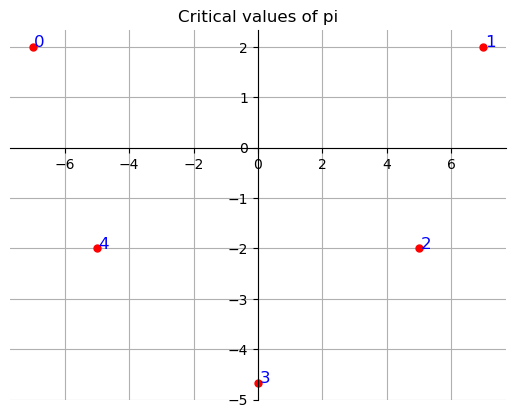

In [91]:
origin_fibre = 0
crit_values_f = sort_by_angle(crit_values_f, origin_fibre)
plot_points_ordered(crit_values_f, 'Critical values of pi', origin_fibre=origin_fibre)

## Images of the vanishing cycles of $f$ under $\rho$

### Critical values of $\rho$

6
6


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

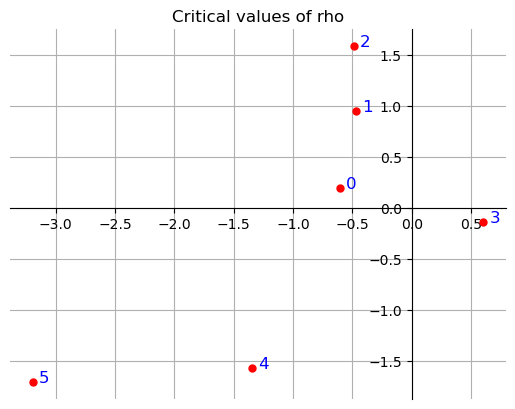

In [101]:
solvefor = z

t = var('t', domain=CC)
fibre_t = f.get_fibre(t, solvefor)
rho_eq_t = rho_eq.subs(solvefor==fibre_t)
rho_eq = rho_eq_t.subs(t==origin_fibre)
variables = [x,y,z]
variables.remove(solvefor)
rho = LefschetzFibration(variables, fibre_t.subs(t==origin_fibre), rho_eq_t.subs(t==origin_fibre))
print(len(rho.get_critical_points()))
print(len(rho.get_critical_values()))
plot_points_ordered(rho.get_critical_values(), origin_fibre=origin_fibre, title="Critical values of rho")

### 3D plot respecting time

In [102]:
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

### Plot the matching paths

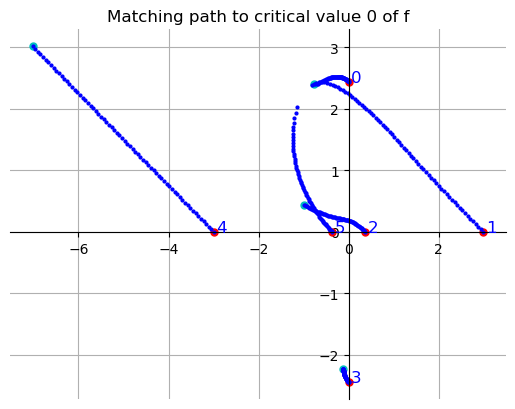

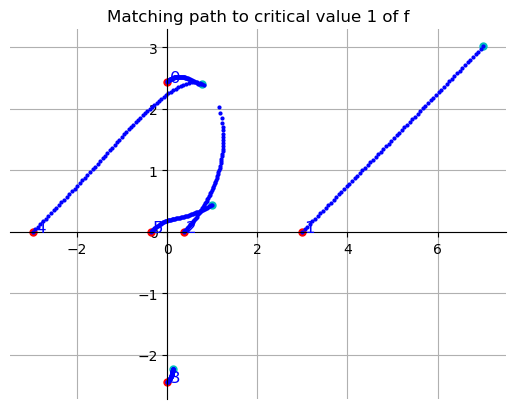

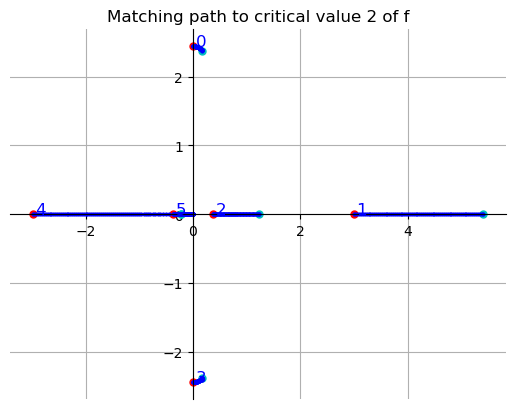

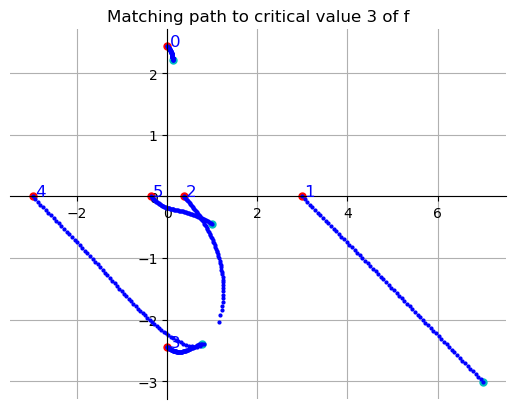

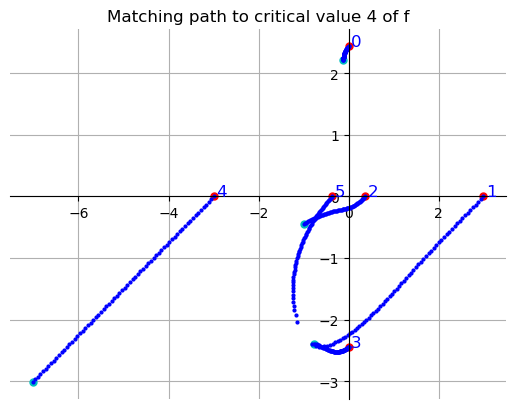

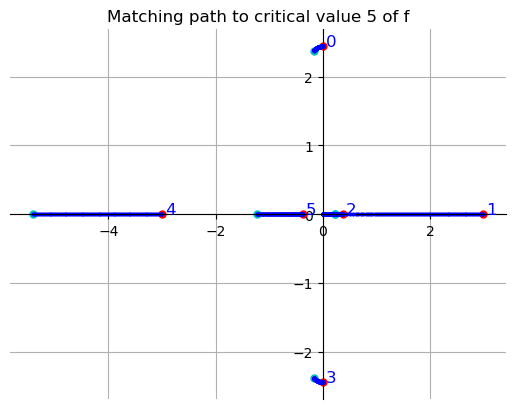

In [13]:
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, origin_fibre, crit, solvefor=y)
    fig, ax = plot_path(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)
    plt.show()

### Plot using PW Linear paths avoiding collinear critical values

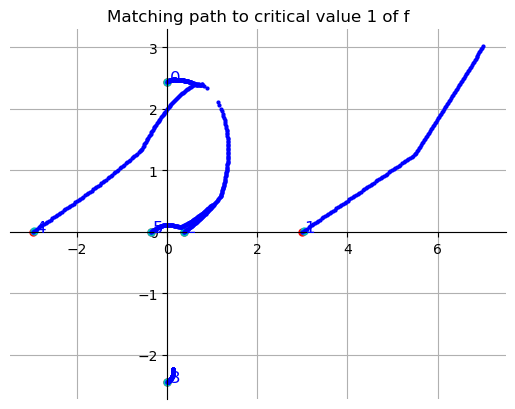

In [14]:

matching = f.get_matching_path(rho_eq, solvefor=y, path=pl_path_1(0, crit_values_f[1]))
fig, ax = plot_path(matching, title = f'Matching path to critical value 1 of f', origin_fibre=origin_fibre)
plt.show()

In [428]:
print(crit_values_f[1])
print(crit_values_f[2])

(3.2781296869160643+0j)
(1.6595844138804132+0j)


### Vanishing Cycles of $\rho$

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

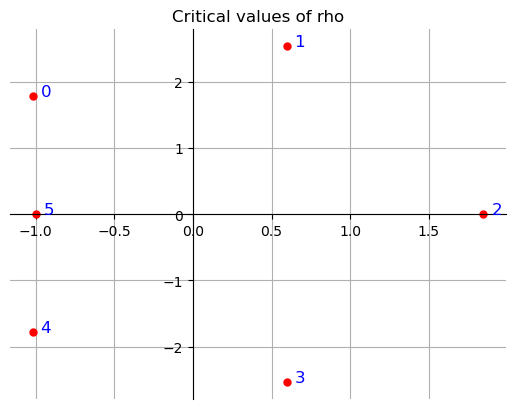

In [467]:
rho = LefschetzFibration(f.variables, fibre_t.subs(t==origin_fibre), rho_eq)
rho_t = rho.get_fibre(t, z)
crit_values_rho = sort_by_angle(rho.get_critical_values(), origin_fibre)
plot_points_ordered(crit_values_rho, title='Critical values of rho', origin_fibre=origin_fibre)

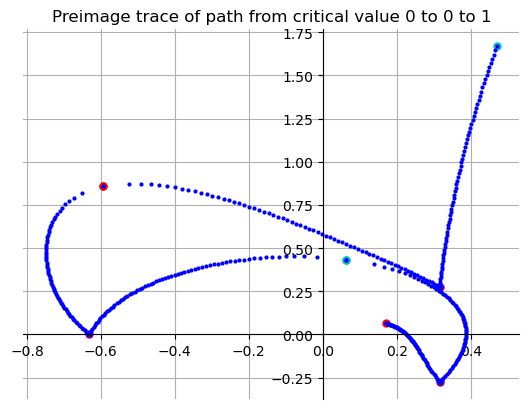

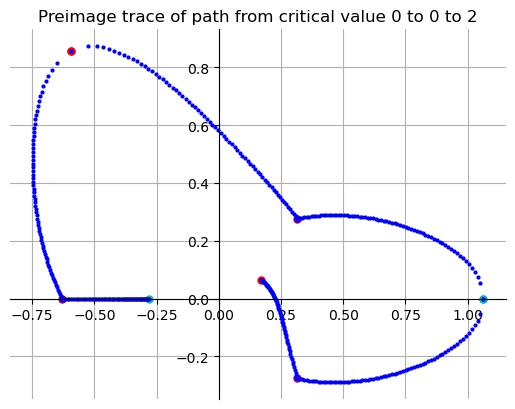

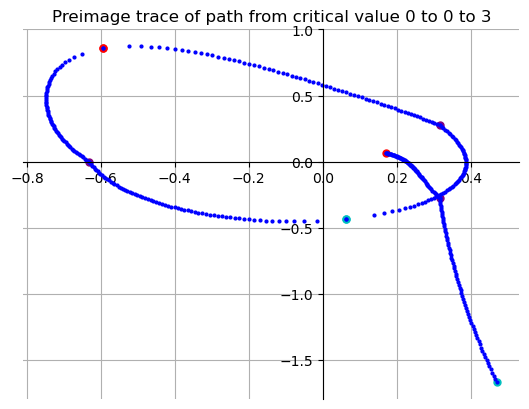

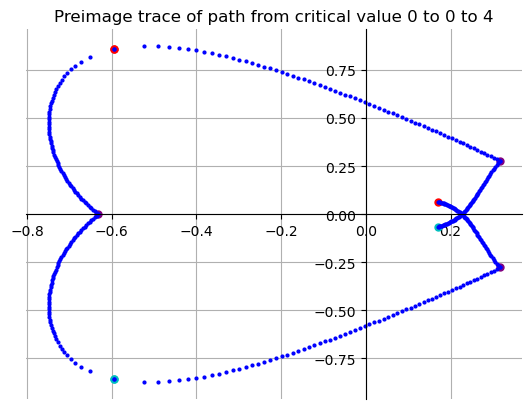

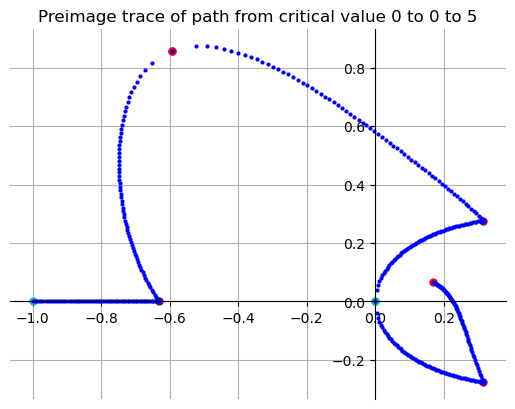

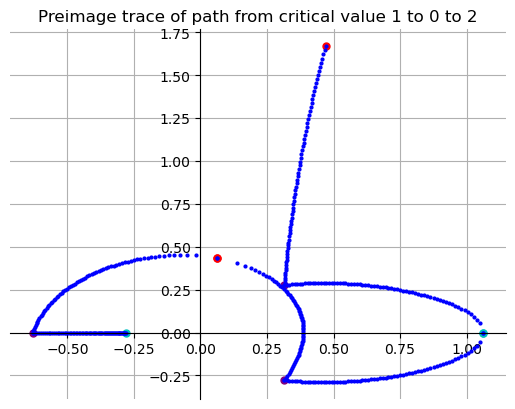

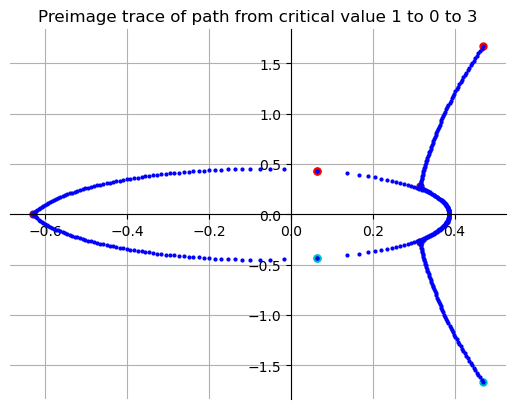

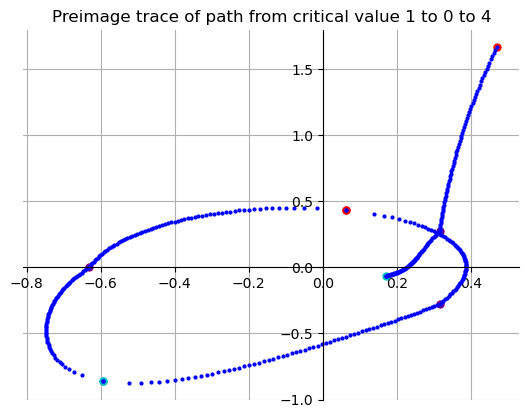

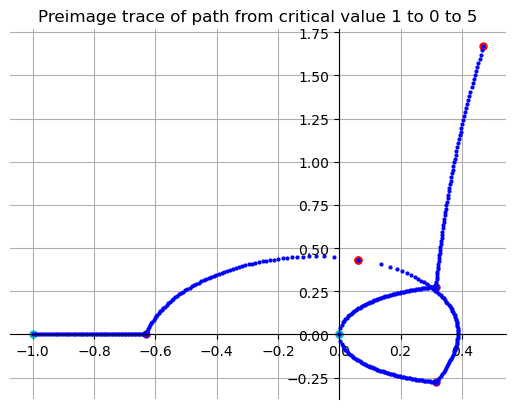

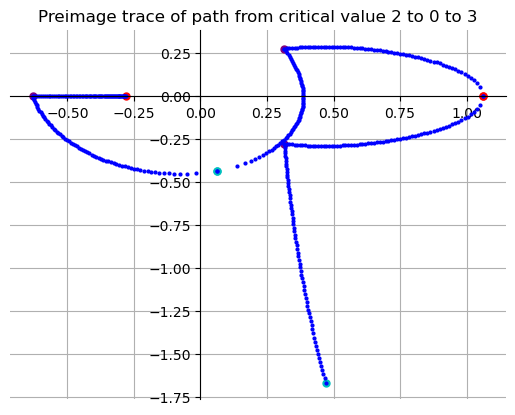

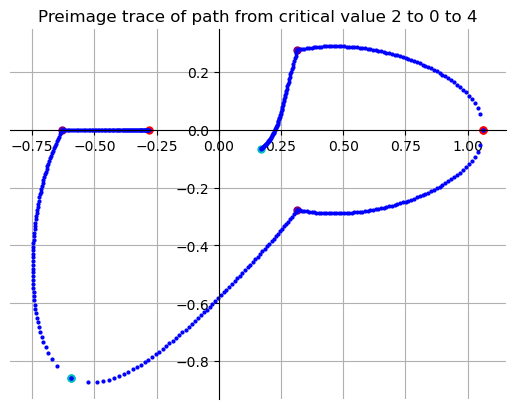

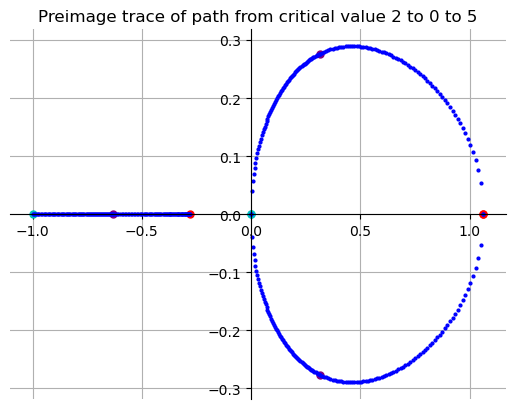

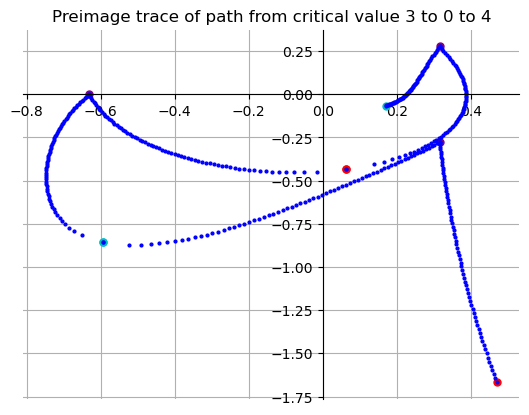

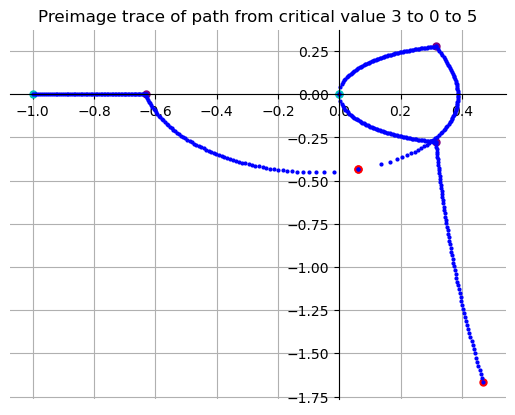

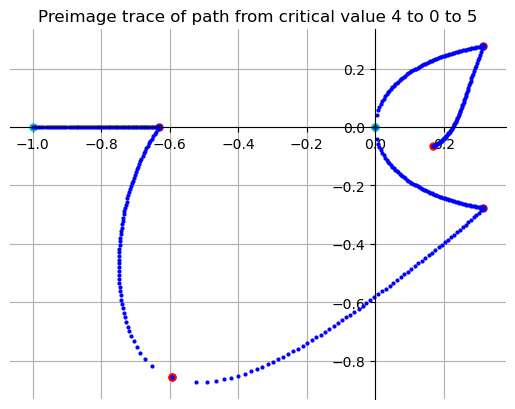

In [506]:

for index_1, point_1 in enumerate(crit_values_rho):
    for index_2, point_2 in enumerate(crit_values_rho):
        if not index_1 >= index_2:
            path = pl_path([point_1, origin_fibre, point_2], steps=70)
            fig, ax = trace_preimage(rho, t, path, solvefor=z, title=f'Preimage trace of path from critical value {index_1} to 0 to {index_2}')
            plt.show()
# path = pl_path([complex(0,0), crit_values_rho[1]], steps=140)
    

In [496]:
print(len(path))

140


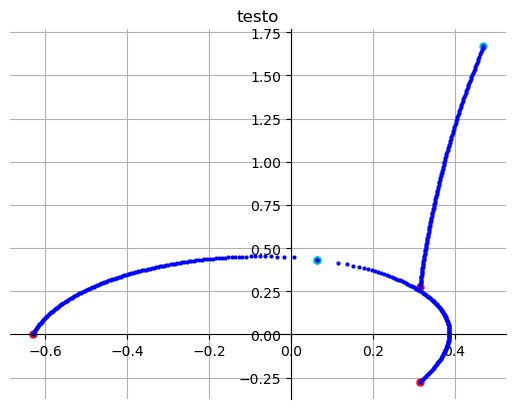

In [500]:
fig, ax = trace_preimage(rho, t, path, solvefor=z, title='testo')

plt.show()


In [466]:
s = path[5]
fibre_rho_s = rho.fibration - s
print(fibre_rho_s)
solve(fibre_rho_s==0, x)

3*x + z - 0.04315827121578832 - 0.18378056464573617*I


[x == -1/3*z + 19123810/312173543*I + 49740947/3457572252]